In [9]:
# Juan: se importan librerias

from PIL import Image  # Juan: se usa solo para leer/guardar la imagen y extraer pixeles

import matplotlib.pyplot as plt  # Juan: se usa para mostrar las imagenes

import numpy as np  # Juan: se usa solo para convertir listas a arreglos al momento de graficar

import io, os  # Juan: se gestiona E/S de archivos


In [10]:
# Juan: se define una variable para ruta directa; si se deja en None se intentara la subida o la generacion

RUTA_IMAGEN = None

# Juan: se implementa una funcion que prioriza ruta, luego subida en Colab, y por ultimo generacion de ejemplo

def obtener_imagen():

    # Juan: se intenta

    if RUTA_IMAGEN is not None and os.path.exists(RUTA_IMAGEN):

        # Juan: se abre la imagen desde la ruta indicada

        return Image.open(RUTA_IMAGEN).convert('RGB')

    # Juan: se intenta detectar entorno Colab para permitir subida manual

    try:

        from google.colab import files  # Juan: se importa modulo de Colab para subida

        # Juan: se solicita al usuario seleccionar un archivo; se descarga al entorno temporal

        print('Seleccione un archivo JPG/PNG desde su equipo...')

        subidos = files.upload()

        # Juan: se toma el primer archivo subido

        nombre = next(iter(subidos.keys()))

        # Juan: se abre y se convierte a RGB para estandarizar

        return Image.open(io.BytesIO(subidos[nombre])).convert('RGB')

    except Exception as e:

        # Juan: si no hay Colab o no se sube nada, se genera una imagen de ejemplo

        print('No se detecta subida; se genera una imagen de ejemplo. Motivo:', e)

        # Juan: se crea un gradiente con un rectangulo central para probar

        w, h = 256, 192  # Juan: se definen dimensiones de ejemplo

        img = Image.new('RGB', (w, h))

        # Juan: se recorre pixel a pixel para pintar un gradiente

        pix = img.load()

        for y in range(h):

            for x in range(w):

                r = int(255 * x / (w - 1))  # Juan: se define canal R como gradiente horizontal

                g = int(255 * y / (h - 1))  # Juan: se define canal G como gradiente vertical

                b = int(255 * ((x + y) / (w + h - 2)))  # Juan: se define canal B como mezcla

                pix[x, y] = (r, g, b)  # Juan: se asigna el pixel

        # Juan: se dibuja un rectangulo central para mas contraste

        for y in range(h//3, 2*h//3):

            for x in range(w//3, 2*w//3):

                pix[x, y] = (255 - pix[x, y][0], 255 - pix[x, y][1], 255 - pix[x, y][2])  # Juan: se invierte color

        return img

# Juan: se obtiene la imagen de entrada siguiendo la prioridad definida

imagen_rgb = obtener_imagen()

# Juan: se muestra un resumen

print('Tamaño:', imagen_rgb.size, '| Modo:', imagen_rgb.mode)


Seleccione un archivo JPG/PNG desde su equipo...


Saving 1366_2000.jpg to 1366_2000.jpg
Tamaño: (1200, 800) | Modo: RGB


## Conversión a tensor 3D

In [11]:
# Juan: se convierte la imagen PIL en una estructura de listas anidadas [alto][ancho][canal]

def imagen_a_tensor_listas(img):

    # Juan: se asegura que la imagen este en RGB

    img = img.convert('RGB')

    ancho, alto = img.size  # Juan: se obtienen dimensiones

    pix = img.load()  # Juan: se accede a los pixeles

    tensor = []  # Juan: se inicializa contenedor 3D

    for y in range(alto):  # Juan: se recorre cada fila

        fila = []  # Juan: se prepara fila de pixeles

        for x in range(ancho):  # Juan: se recorre cada columna

            r, g, b = pix[x, y]  # Juan: se obtiene el pixel

            fila.append([int(r), int(g), int(b)])  # Juan: se guarda como vector RGB

        tensor.append(fila)  # Juan: se agrega la fila completa

    return tensor  # Juan: se retorna el tensor 3D

tensor_rgb = imagen_a_tensor_listas(imagen_rgb)  # Juan: se construye el tensor

# Juan: se muestra una muestra del primer pixel para verificar

print('Ejemplo pixel [0][0]:', tensor_rgb[0][0], '| Dimensiones (alto, ancho, canales):', len(tensor_rgb), len(tensor_rgb[0]), len(tensor_rgb[0][0]))


Ejemplo pixel [0][0]: [48, 199, 254] | Dimensiones (alto, ancho, canales): 800 1200 3


## Conversión a escala de grises

In [12]:
# Juan: se transforma el tensor RGB 3D a un tensor 2D de grises

def rgb_a_gris_tensor(tensor_rgb):

    alto = len(tensor_rgb)  # Juan: se obtiene alto

    ancho = len(tensor_rgb[0])  # Juan: se obtiene ancho

    tensor_gris = []  # Juan: se prepara contenedor 2D

    for y in range(alto):  # Juan: se recorre cada fila

        fila = []  # Juan: se crea fila para valores de gris

        for x in range(ancho):  # Juan: se recorre cada columna

            r, g, b = tensor_rgb[y][x]  # Juan: se extrae vector RGB

            gris = 0.299 * r + 0.587 * g + 0.114 * b  # Juan: se aplica formula

            fila.append(int(round(gris)))  # Juan: se redondea y se guarda como entero

        tensor_gris.append(fila)  # Juan: se agrega la fila al tensor 2D

    return tensor_gris  # Juan: se retorna el tensor 2D

tensor_gris = rgb_a_gris_tensor(tensor_rgb)  # Juan: se obtiene tensor de grises

print('Ejemplo gris [0][0]:', tensor_gris[0][0], '| Dimensiones (alto, ancho):', len(tensor_gris), len(tensor_gris[0]))


Ejemplo gris [0][0]: 160 | Dimensiones (alto, ancho): 800 1200


## Visualización desde los tensores

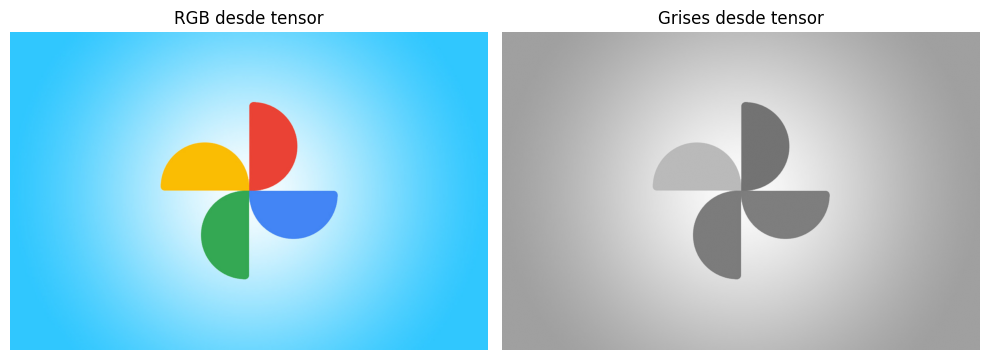

In [13]:
# Juan: se convierten las listas a arreglos numpy unicamente para graficar

arr_rgb = np.array(tensor_rgb, dtype=np.uint8)  # Juan: se crea arreglo alto x ancho x 3

arr_gris = np.array(tensor_gris, dtype=np.uint8)  # Juan: se crea arreglo alto x ancho

# Juan: se muestra lado a lado

plt.figure(figsize=(10,4))  # Juan: se define el tamano del lienzo

plt.subplot(1,2,1)  # Juan: se prepara primer panel

plt.title('RGB desde tensor')  # Juan: se pone titulo

plt.imshow(arr_rgb)  # Juan: se visualiza la imagen RGB

plt.axis('off')  # Juan: se ocultan ejes

plt.subplot(1,2,2)  # Juan: se prepara segundo panel

plt.title('Grises desde tensor')  # Juan: se pone titulo

plt.imshow(arr_gris, cmap='gray', vmin=0, vmax=255)  # Juan: se visualiza como escala de grises

plt.axis('off')  # Juan: se ocultan ejes

plt.tight_layout()  # Juan: se ajusta el espaciado

plt.show()  # Juan: se muestra en pantalla


## Guardar resultados

In [14]:
# Juan: se reconstruyen imágenes PIL a partir de los tensores y se guardan

def tensor_rgb_a_imagen(tensor_rgb):

    # Juan: se convierte la estructura de listas a Image RGB

    arr = np.array(tensor_rgb, dtype=np.uint8)  # Juan: se crea arreglo auxiliar

    im = Image.fromarray(arr).convert("RGB")  # Juan: se crea imagen PIL

    return im  # Juan: se retorna imagen

def tensor_gris_a_imagen(tensor_gris):

    # Juan: se convierte la estructura 2D de listas a Image L (8 bits)

    arr = np.array(tensor_gris, dtype=np.uint8)  # Juan: se crea arreglo auxiliar

    im = Image.fromarray(arr).convert("L")  # Juan: se crea imagen PIL en modo luminancia

    return im  # Juan: se retorna imagen

# Juan: se crean imágenes desde los tensores

img_rgb_out = tensor_rgb_a_imagen(tensor_rgb)  # Juan: se crea imagen RGB

img_gris_out = tensor_gris_a_imagen(tensor_gris)  # Juan: se crea imagen en grises

# Juan: se asegura que exista la carpeta de salida

os.makedirs("/mnt/data", exist_ok=True)  # Juan: se crea carpeta si no existe

# Juan: se definen rutas de salida

out_rgb = '/mnt/data/salida_rgb_desde_tensor.png'  # Juan: se define ruta de salida RGB

out_gray = '/mnt/data/salida_gris_desde_tensor.png'  # Juan: se define ruta de salida gris

# Juan: se guardan archivos

img_rgb_out.save(out_rgb)  # Juan: se guarda RGB

img_gris_out.save(out_gray)  # Juan: se guarda gris

print('Se guarda RGB en:', out_rgb)  # Juan: se informa ruta

print('Se guarda Gris en:', out_gray)  # Juan: se informa ruta


Se guarda RGB en: /mnt/data/salida_rgb_desde_tensor.png
Se guarda Gris en: /mnt/data/salida_gris_desde_tensor.png


## Prueba puntual de la fórmula

In [15]:
# Juan: se elige un pixel aleatorio para verificar la conversion

import random  # Juan: se importa modulo para aleatoriedad

alto, ancho = len(tensor_rgb), len(tensor_rgb[0])  # Juan: se obtienen dimensiones

y = random.randrange(alto)  # Juan: se elige fila

x = random.randrange(ancho)  # Juan: se elige columna

r, g, b = tensor_rgb[y][x]  # Juan: se obtiene pixel RGB

gris_esperado = int(round(0.299*r + 0.587*g + 0.114*b))  # Juan: se calcula gris

gris_tensor = tensor_gris[y][x]  # Juan: se toma gris del tensor

print(f'Pixel ({y},{x}) -> RGB={r,g,b} | Gris esperado={gris_esperado} | Gris tensor={gris_tensor}')  # Juan: se imprime verificacion


Pixel (214,796) -> RGB=(163, 230, 255) | Gris esperado=213 | Gris tensor=213
